# Twitter Sentiment Analysis

- Download your twitter archive from:
 - More
 - Settings and Privacy
 - Data & Permissions
 - Your Twitter Data
- You'll need to provide your password again
- You'll need to 'request' your data first
- You'll receive an email when it is ready to download
- Copy that file into the directory where your tutorial files are


In [14]:
#Import a lot of stuff

import os
import string
import json
import nltk
import pandas as pd
import matplotlib.pyplot as plt


from shutil import unpack_archive

from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

In [15]:
#Download all the necessary NLTK info
#Run this cell twice
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tribaric/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
# Unzip the archive and put it in a folder
# Just do this once
for f in os.listdir(os.curdir):
    if f.endswith('.zip'):
        unpack_archive(f, 'archive/')

In [17]:
#These cursed javascripts actually contain JSON
#just need to chop out the leading bit of text: window.YTD.tweet.part0 = 
# https://medium.com/@oyeAbhishek/how-to-get-your-top-tweets-without-any-external-tool-40a4a8076122
!sed 's/window\.YTD\.tweet\.part0\ \=//' archive/tweet.js > archive/tweet.json

In [18]:
# Create DataFrame with file we just created
with open('archive/tweet.json') as rdf:
    raw_data = json.load(rdf) 
analysis = pd.DataFrame(raw_data)

analysis["full_text"]

0      @brockhumanities @BrockMakerSpace We're here a...
1      New pod. It's an @AliciaLFloyd episode! \n\nWe...
2      Only 8 days left to register! Don't miss out o...
3      RT @Brock_LINC: An Introduction to QGIS 3.6 Wo...
4      The future is near! New furniture in the RFP.\...
5      Learn about accelerating research &amp; innova...
6      No too late to come on by. Still a couple of s...
7      Coming up on Aug. 7 the MDGL and the DSL will ...
8      Coming up on July 25th from 10-11AM the Digita...
9      Looking forward to our Introduction to Data Vi...
10     We are very much in the dog days of summer.\n\...
11     A new member has joined the Brock Library team...
12     Be well with our the new podcast episode.\n\nh...
13     Display screens and furniture beginning to app...
14     RT @DNLynch: Exciting to feel the summer breez...
15     We’ve been looking forward to this workshop! @...
16     It's not too late to register for the Introduc...
17     Ever wonder how to draw 

In [19]:
#Binary Sentiment
#Looks at all of our tweets and determines which are 'positive', 'negative', or 'neutral' based on binary classification


sid = SentimentIntensityAnalyzer()
summary = {"positive":0,"neutral":0,"negative":0}
for x in analysis["full_text"]:
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0:
        analysis = analysis.append({"Sent": "NEU", "Text": x},ignore_index=True)
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        analysis = analysis.append({"Sent": "POS", "Text": x},ignore_index=True)
        summary["positive"] +=1
    else:
        analysis = analysis.append({"Sent": "NEG", "Text": x},ignore_index=True)
        summary["negative"] +=1

        
print(summary)
print("Done!")

{'positive': 167, 'neutral': 117, 'negative': 13}
Done!


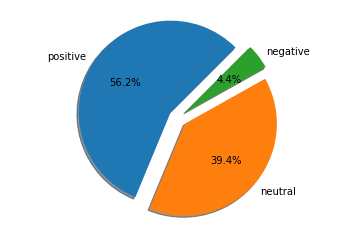

In [20]:
#Plot out that binary info into a nice pie
plt.pie([float(s) for s in summary.values()],labels=[str(l) for l in summary.keys()],autopct='%.1f%%', explode=[.1,.1,.1], shadow=True, startangle=45)
plt.axis('equal')
plt.show()